### Library Imports

In [1]:
import pandas as pd

import numpy as np
import itertools

import random
random.seed(1234)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

### DATA Import

In [2]:
raw = pd.read_csv('AC_Tornps_ExcelSim.csv')
raw

,SIM_ID,WEEK,OBS,REGIME,SIM_WK_REG_ID,OUTPUT,VALUE,PREV_REGIME,WTD_RET,RANK_RET,WTD_RET_ZSCORE,WTD_RET_MINMAXSCALE,D_RET
0,1,1,0,3,1 - 1 - 3,PRICE_0,97,3,0.000000,0,NaN,NaN,0.000000
1,1,1,1,3,1 - 1 - 3,PRICE_1,77,3,-0.206186,4,-0.188380,0.190476,-0.206186
2,1,1,2,3,1 - 1 - 3,PRICE_2,73,3,-0.247423,7,-0.323340,0.152381,-0.051948
3,1,1,3,3,1 - 1 - 3,PRICE_3,70,3,-0.278351,8,-0.424559,0.123810,-0.041096
4,1,1,4,3,1 - 1 - 3,PRICE_4,66,3,-0.319588,9,-0.559518,0.085714,-0.057143
5,1,1,5,3,1 - 1 - 3,PRICE_5,63,3,-0.350515,10,-0.660737,0.057143,-0.045455
6,1,1,6,3,1 - 1 - 3,PRICE_6,111,3,0.144330,2,0.958772,0.514286,0.761905
7,1,1,7,3,1 - 1 - 3,PRICE_7,101,3,0.041237,3,0.621374,0.419048,-0.090090
8,1,1,8,3,1 - 1 - 3,PRICE_8,57,3,-0.412371,12,-0.863176,0.000000,-0.435644
9,1,1,9,3,1 - 1 - 3,PRICE_9,162,3,0.670103,1,2.679501,1.000000,1.842105


In [3]:
raw.columns

Index(['SIM_ID', 'WEEK', 'OBS', 'REGIME', 'SIM_WK_REG_ID', 'OUTPUT', 'VALUE',
       'PREV_REGIME', 'WTD_RET', 'RANK_RET', 'WTD_RET_ZSCORE',
       'WTD_RET_MINMAXSCALE', 'D_RET'],
      dtype='object')

## Analysis

In [4]:
df_WTD_RET = raw.pivot_table(index='RANK_RET',columns='SIM_WK_REG_ID',values='WTD_RET').drop(0).fillna(method='ffill')
df_D_RET = raw.pivot_table(index='RANK_RET',columns='SIM_WK_REG_ID',values='D_RET').drop(0).fillna(method='ffill')

df_CLUSTER = pd.concat([pd.DataFrame(df_D_RET.std(), columns={'D_STD'}),
                        pd.DataFrame(df_WTD_RET.std(), columns={'WTD_STD'}),
                        0.5-(df_WTD_RET.quantile(0.5)-df_WTD_RET.quantile(0))/(df_WTD_RET.quantile(1)-df_WTD_RET.quantile(0))
                       ],axis=1)
df_CLUSTER = df_CLUSTER.rename(columns={0:'CURVATURE'})

df_SIM_WK_REG_ID = df_CLUSTER.index

X = df_CLUSTER.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

df_REGIME_ID = pd.DataFrame(labels, index=df_SIM_WK_REG_ID, columns=['REGIME_ID'])

In [5]:
Y = pd.concat([df_CLUSTER,df_REGIME_ID], axis=1)
Y.to_csv('test.csv')

## Results

Text(0.5,0.92,'Regime Clusters')

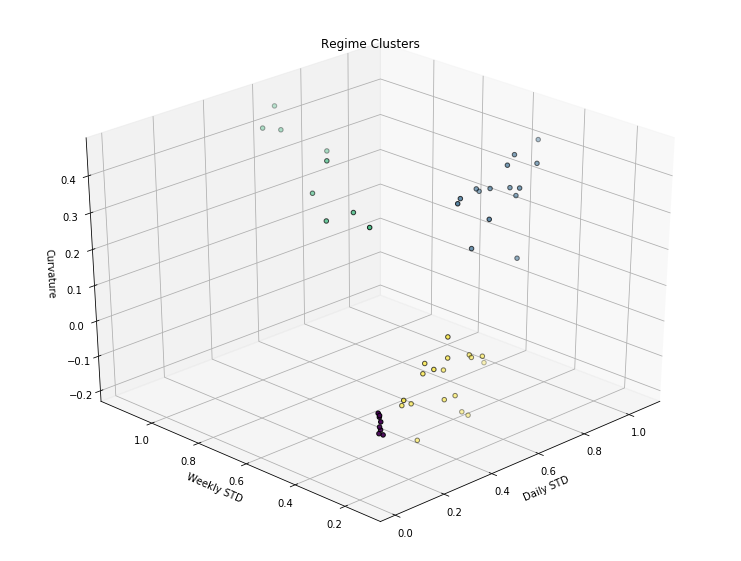

In [6]:
fig = plt.figure('Regime Clusters', figsize=(10, 7.5))

ax = Axes3D(fig, rect=[1, 1, 1, 1], elev=30, azim=-135)
labels = kmeans.labels_

title = 'Regime Clusters'

ax.scatter(X[:,0], X[:,1], X[:,2],
               c=labels.astype(np.float), edgecolor='k')

ax.set_xlabel('Daily STD')
ax.set_ylabel('Weekly STD')
ax.set_zlabel('Curvature')
ax.set_title(title)